<a href="https://colab.research.google.com/github/luiscarlo5/Modelagem_Predicao_Imoveis/blob/main/Modelagem_dos_dados_de_im%C3%B3veis_para_previs%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de Regressão e Árvores de Decisão para Oficina 1 do Programa Capacita Brasil**
**Autor:** Luis Carlos Rodrigues dos Anjos

**Instituição:** UECE - Capacita Brasil

**Data:** 31/08/2025

**Linkedin:** www.linkedin.com/in/luis-carlos-eng-comp

**GitHub:** https://github.com/luiscarlo5/Modelagem_Predicao_Imoveis


# **Modelagem dos dados de imóveis para previsões**

## **Importação de Bibliotecas**

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## **Análise exploratória de dados (EDA)**

### Leitura e visualização dos dados

In [52]:
df = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### One Hot Enconding

- Observe que a coluna `ocean_proximity` está em dados categórigos, logo haverá uma modificação dos dados desta coluna para que o modelo tenha dados de entrada númericos


In [45]:
valores_unicos = df['ocean_proximity'].unique()
print(valores_unicos)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [53]:
# One Hot Enconding da coluna ocean_proximity com get_dummies
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], dtype=int)

# Exibe as primeiras linhas
print(df_encoded.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                          0                       0                       0   
1   

In [81]:
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [55]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  int64  
 10  ocean_proximity_INLAND      20640 non-null  int64  
 11  ocean_proximity_ISLAND      20640 non-null  int64  
 12  ocean_proximity_NEAR BAY    20640 non-null  int64  
 13  ocean_proximity_NEAR OCEAN  206

### Histogramas

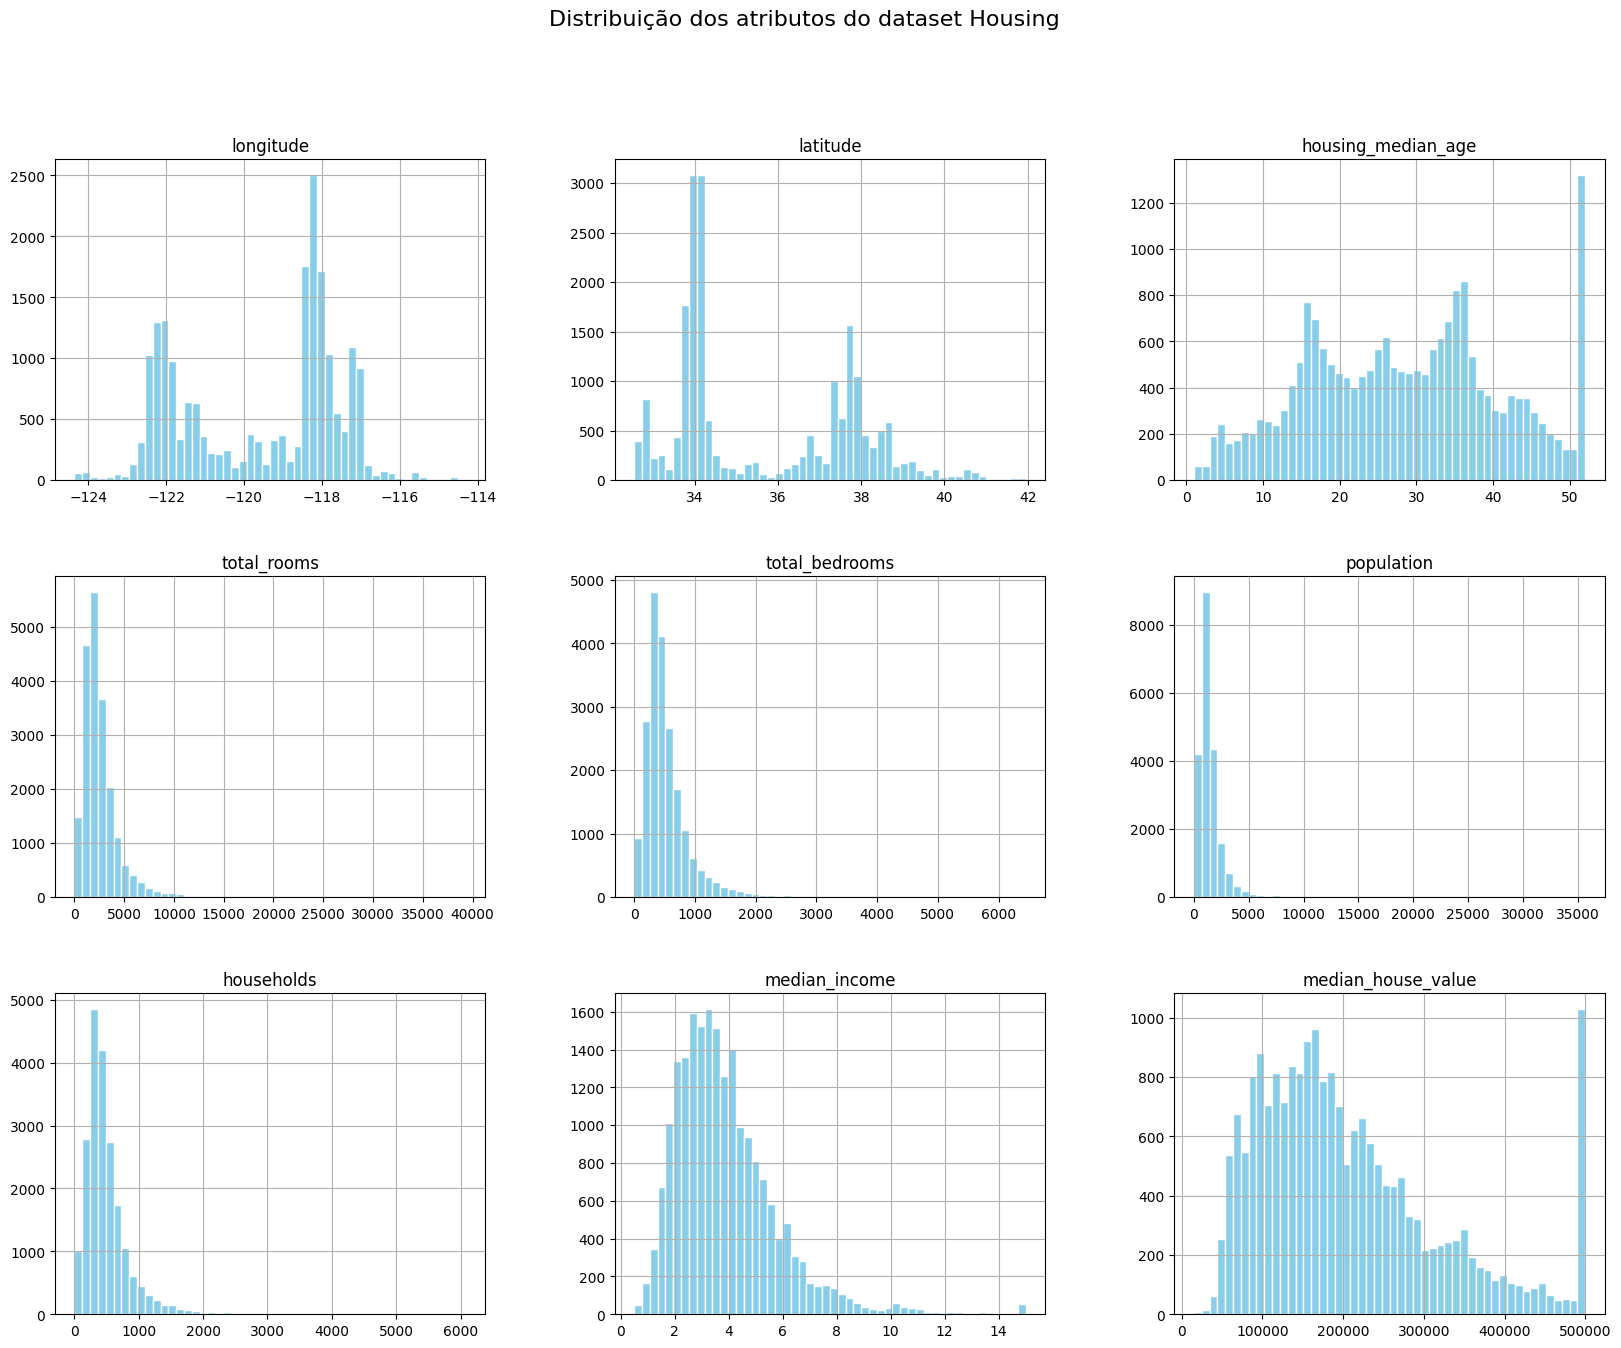

In [58]:

# Criar histogramas de todas as colunas numéricas
df.hist(bins=50, figsize=(20,15), color="skyblue", edgecolor="white")
plt.suptitle("Distribuição dos atributos do dataset Housing", fontsize=16)
plt.show()
# não utilizado o df_encoded aqui pois nã faz sentido ver o histgrama de dados novos (novas 5 colunas)

### Gráficos de Dispersão

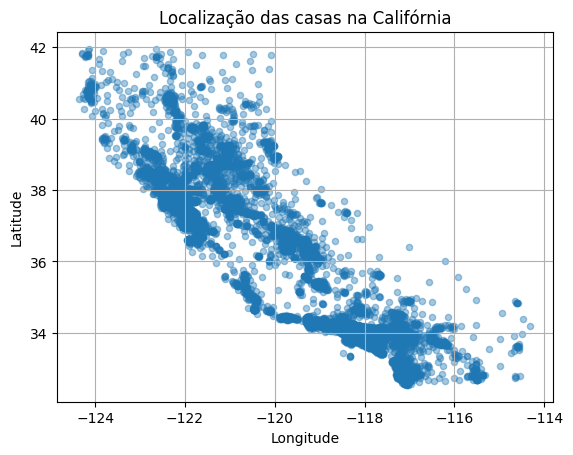

In [82]:
# Criar gráfico de dispersão entre os atributos longitude e latitude
ax = df_encoded.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
ax.set_title("Localização das casas na Califórnia")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.grid(True)
plt.show()

- Correlação Linear Negativa que mostra que quanto menor a altitude, menor é a longitude do imóvel.


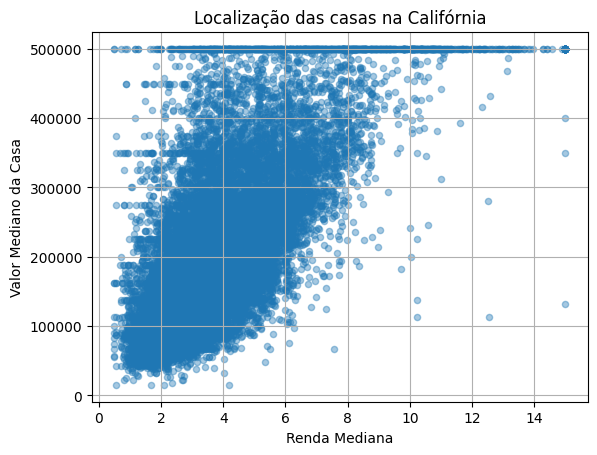

In [83]:
# Criar gráfico de dispersão entre os atributos de renda mediana e valor mediano da casa.
ax = df_encoded.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.4)
ax.set_title("Localização das casas na Califórnia")
ax.set_xlabel("Renda Mediana")
ax.set_ylabel("Valor Mediano da Casa")
plt.grid(True)
plt.show()

- Uma correlação clara é vísivel e faz sentido pois em regiões mais ricas geralmente têm casas mais caras.
- Além disso, o dataset demonstra ter um teto de valores em torno de 500 mil para o valor mediano da casa.
- A maioria das rendas medianas está entre 2 e 6, o que demonstra que grande parte da população da Califórnia tem rendas medianas relativamente baixas/médias.

## **Análise de Outliers e Remoção de dados Faltantes**


##### Gráfico de Box Plot

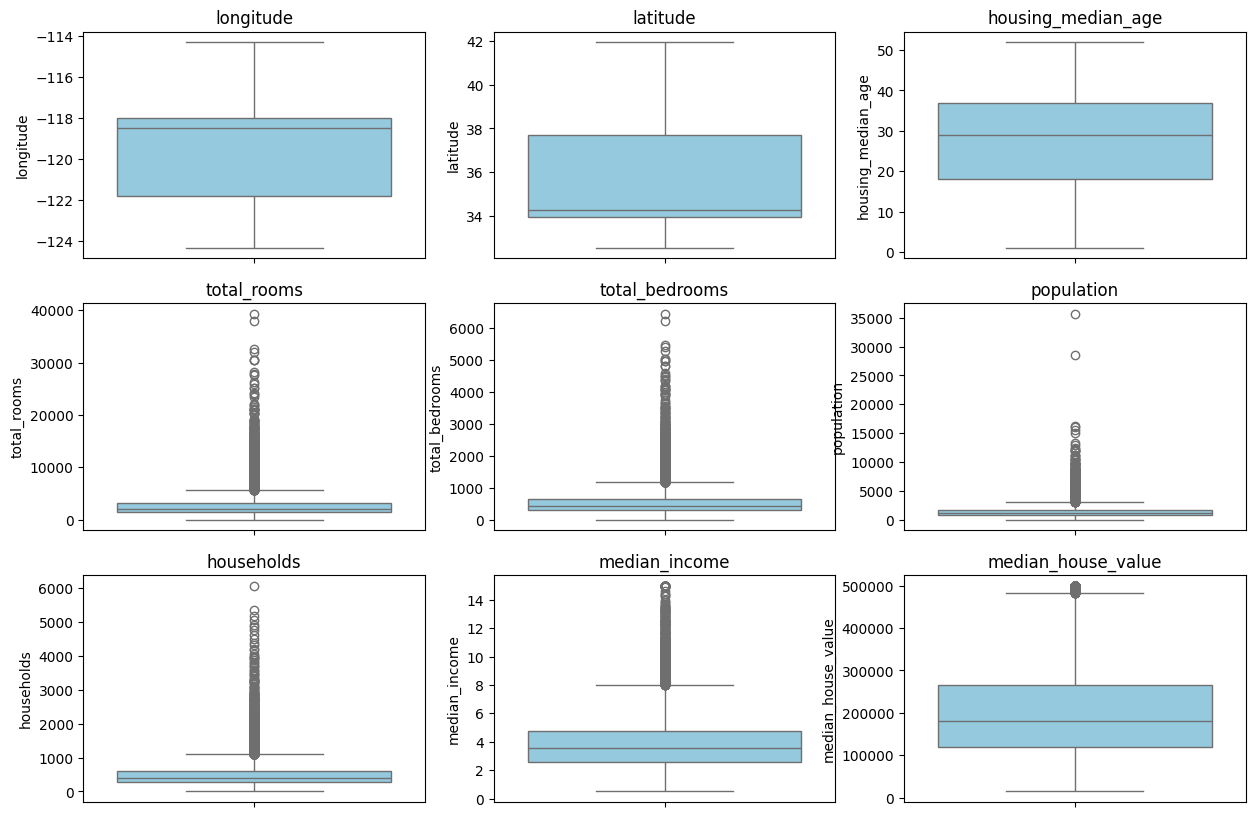

In [84]:

# Selecionar apenas colunas numéricas
numeric_cols = df_encoded.select_dtypes(include=["float64"]).columns

# Criar boxplots para cada coluna numérica
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)   # cria grid de subplots (3x3)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)

- É possível ver que, exceto os 3 primeiros gráficos, há bastante dados com outlies e que a seguir serão tratados com a técnica de **Z-Score**, em que se substitui um valor que esta fora da do intervalo [ média - 3 * desvio padrão, média + 3 * desvio padrão ].

#### Tratamento de Outliers com Z-Score

- Para solucionar a questão de outliers foi utilizado a técnica de Z-Score com liite de Z-score igual a 2, visto de maioria dos dados não se distanciam muito da média, exceto os outliers é claro.
- A substituição do outliers e de dados faltantes foi feita pelo valor médio da respectiva coluna/atributo.


In [86]:
# Selecionar apenas colunas numéricas
numeric_cols = df_encoded.select_dtypes(include=["float64"]).columns

# Criar cópia para não alterar o original
df_clean = df_encoded.copy()

# Definir limite de Z-Score
limite = 2
print(numeric_cols)
for col in numeric_cols:
    if col == "housing_median_age" or col == "latitude" or  col == "longitude":
        continue
    # Preencher valores ausentes com a mediana antes de calcular o Z-Score
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())


    z_scores = stats.zscore(df_clean[col])           # calcula Z-Score
    outliers = np.abs(z_scores) > limite             # identifica outliers

    # Substituir outliers pela média da column
    media = df_clean[col].mean()
    df_clean.loc[outliers, col] = media

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


##### Gráfico Box Plot pós tratamento

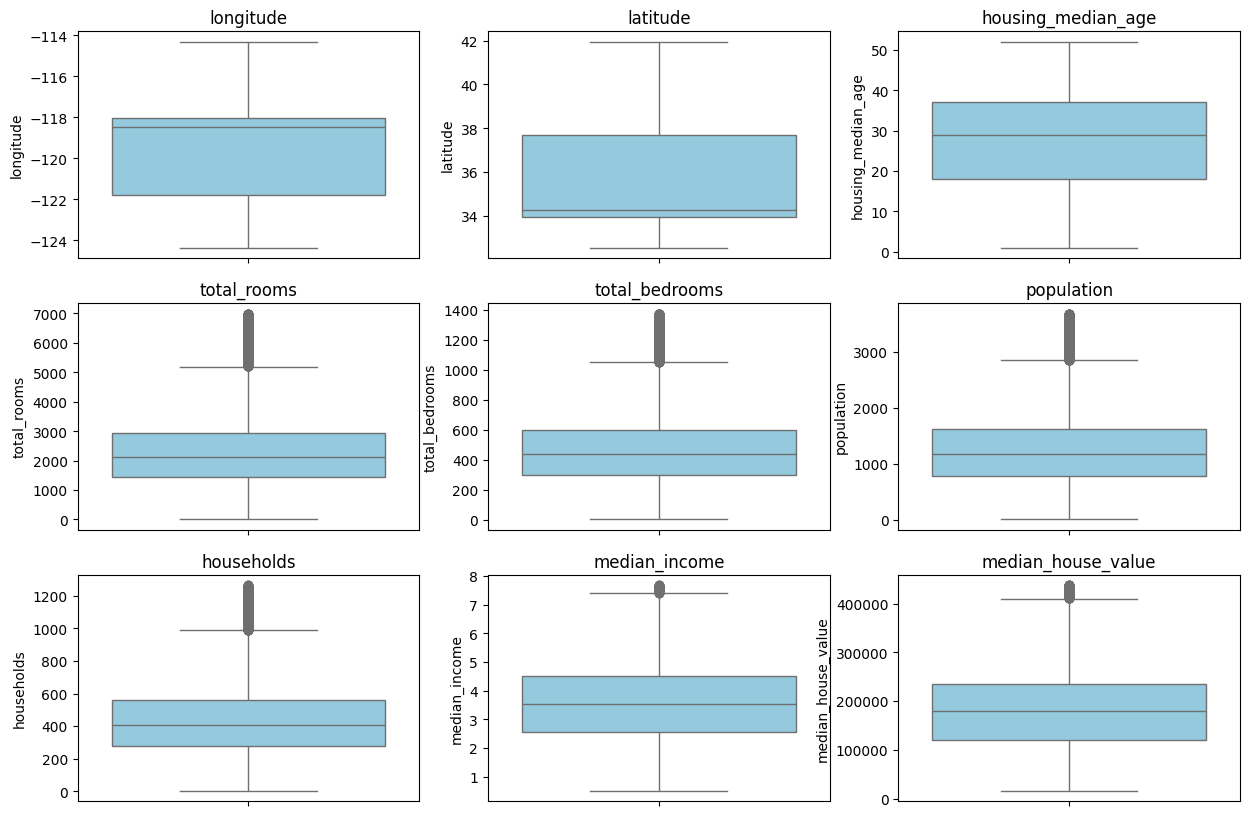

In [87]:
# Criar boxplots para cada coluna numérica
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)   # cria grid de subplots (3x3)
    sns.boxplot(y=df_clean[col], color="skyblue")
    plt.title(col)

- Agora é possível visuailizar uma conformidade maior entre os dados do dataset com um número bem menor de amostras se distanciando da média.

##  **Divisão dos dados**

 ### Divisão de Features( variáveis independentes, atributos) e Target (variável dependente, rótulo, alvo)

In [88]:
# Colunas de atributos (todas as colunas menos a target/Alvo)
X = df_clean.drop('median_house_value', axis=1)

# Target/Alvo (variável que queremos prever)
y = df_clean['median_house_value']


### Divisão de dados de teste e de treino

In [89]:
# 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,   # 30% para teste
    random_state=42  # fixar semente para reproduzibilidade
)



### Divisão de dados de treino e de teste com colunas específicas

In [111]:
# Selecionar apenas algumas features específicas para teste a seguir
selected_features = ['median_income', 'housing_median_age', 'total_rooms']

X_sel = df_clean[selected_features]

# Divisão em treino e teste
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_sel, y, test_size=0.3, random_state=42
)

### Visualização do formado dos dados de treino e teste

In [112]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (14448, 13)
X_test: (6192, 13)
y_train: (14448,)
y_test: (6192,)


## **Seleção de variáveis**

### **Regressão Linear**

#### Modelo treinado com todas as features

In [135]:
# Criar o modelo
model_all = LinearRegression()

# Treinar
model_all.fit(X_train, y_train)

# Previsão
y_pred_reg = model_all.predict(X_test)

# Avaliar o modelo
print("Resultado do modelo de Regressão Linear utilizando todas as features:")
print("MAE:", mean_absolute_error(y_test, y_pred_reg))
print("MSE:", mean_squared_error(y_test, y_pred_reg))
print("R²:", r2_score(y_test, y_pred_reg))


Resultado do modelo de Regressão Linear utilizando todas as features:
MAE: 44433.5801390594
MSE: 3589975718.382059
R²: 0.525610403430857


#### Modelo treinado com features específicas

In [134]:


# Criar e treinar o modelo
model_sel = LinearRegression()
model_sel.fit(X_train_sel, y_train_sel)

# Previsão
y_pred_reg_sel = model_sel.predict(X_test_sel)

# Avaliação
print("\nResultado da Regressão Linear usando features selecionadas:")
print("MAE:", mean_absolute_error(y_test_sel, y_pred_reg_sel))
print("MSE:", mean_squared_error(y_test_sel, y_pred_reg_sel))
print("R²:", r2_score(y_test_sel, y_pred_reg_sel))



Resultado da Regressão Linear usando features selecionadas:
MAE: 52757.85801554843
MSE: 4758976716.716653
R²: 0.37113528841843424


### **Árvore de Decisão**

#### Modelo treinado com todas as features

In [117]:
# Criar o modelo de Árvore de Decisão
tree_model = DecisionTreeRegressor(random_state=42, max_depth=10)  # max_depth para evitar overfitting

# Treinar o modelo
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)


print("Desempenho da Árvore de Decisão (Regressão):")
print("MAE:", mean_absolute_error(y_test, y_pred_tree))
print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("R²:", r2_score(y_test, y_pred_tree))


Desempenho da Árvore de Decisão (Regressão):
MAE: 38687.331589576526
MSE: 3112440491.8991985
R²: 0.5887132657368046


#### Modelo treinado com features específicas

In [118]:
# Criar o modelo de Árvore de Decisão
tree_model = DecisionTreeRegressor(random_state=42, max_depth=10)  # max_depth para evitar overfitting

# Treinar o modelo
tree_model.fit(X_train_sel, y_train_sel)

y_pred_tree_sel = tree_model.predict(X_test_sel)


print("Desempenho da Árvore de Decisão (Regressão):")
print("MAE:", mean_absolute_error(y_test, y_pred_tree_sel))
print("MSE:", mean_squared_error(y_test, y_pred_tree_sel))
print("R²:", r2_score(y_test, y_pred_tree_sel))


Desempenho da Árvore de Decisão (Regressão):
MAE: 54407.37088189962
MSE: 5130620480.623085
R²: 0.3220252249925827


## **Comparação entre Resultados de Regressão Linear e Árvore de Decisão**

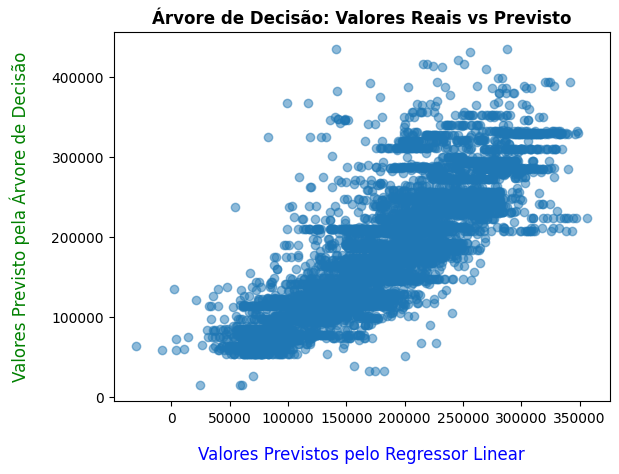

In [132]:
import matplotlib.pyplot as plt

plt.scatter(y_pred_reg, y_pred_tree, alpha=0.5)
plt.xlabel("Valores Previstos pelo Regressor Linear", fontsize=12, color="blue", labelpad=15)
plt.ylabel("Valores Previsto pela Árvore de Decisão", fontsize=12, color="green", labelpad=15)
plt.title("Árvore de Decisão: Valores Reais vs Previsto", fontsize=12, color="black", fontweight="bold")
plt.show()


### **Gráfico em Barra das métricas**:
### - Erro Absoluto Médio
### - Erro Quadrático Médio
### - Coeficiente de Determinação R²


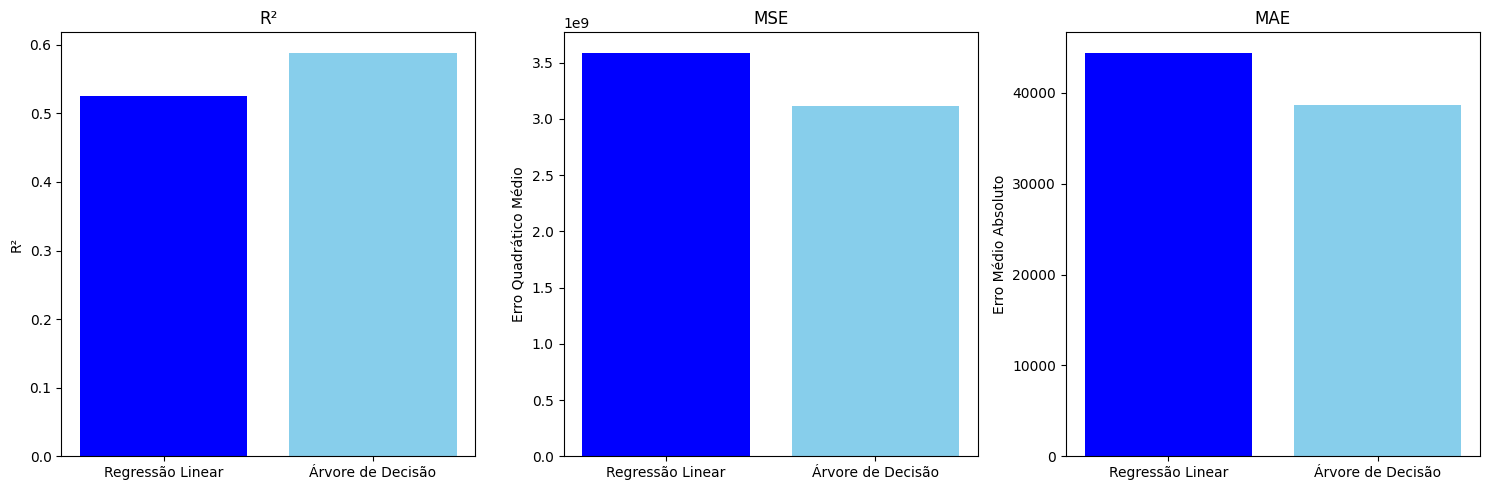

In [133]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

modelos = ["Regressão Linear", "Árvore de Decisão"]

# Calculando métricas
r2 = [r2_score(y_test, y_pred_reg), r2_score(y_test, y_pred_tree)]
mse = [mean_squared_error(y_test, y_pred_reg), mean_squared_error(y_test, y_pred_tree)]
mae = [mean_absolute_error(y_test, y_pred_reg), mean_absolute_error(y_test, y_pred_tree)]

# Criando subplots
fig, axs = plt.subplots(1, 3, figsize=(15,5))  # 1 linha, 3 colunas

# R²
axs[0].bar(modelos, r2, color=['blue','skyblue'])
axs[0].set_title("R²")
axs[0].set_ylabel("R²")

# MSE
axs[1].bar(modelos, mse, color=['blue','skyblue'])
axs[1].set_title("MSE")
axs[1].set_ylabel("Erro Quadrático Médio")

# MAE
axs[2].bar(modelos, mae, color=['blue','skyblue'])
axs[2].set_title("MAE")
axs[2].set_ylabel("Erro Médio Absoluto")

plt.tight_layout()
plt.show()


## **Resultados**

------
------
*Regressão Linear com todas as Features*
- MAE: 44433.5801390594
- MSE: 3589975718.382059
- R²: 0.525610403430857

*Regressão Linear com Features específicas*
- MAE: 52757.85801554843
- MSE: 4758976716.716653
- R²: 0.37113528841843424
------

*Árvore de Decisão com todas as Features*
- MAE: 38687.331589576526
- MSE: 3112440491.8991985
- R²: 0.5887132657368046

*Árvore de Decisão com Features específicas*
- MAE: 54407.37088189962
- MSE: 5130620480.623085
- R²: 0.3220252249925827
------
------

### Regressão Linear
O modelo de regressão linear desempenho bem ultrapassando a 0.5 com Coeficiente de Determinação R². No entanto, treinar o modelo apenas com as festures `median_income`, `housing_median_age`, e `total_rooms` ocasionou em resultados inferiores e isso é exposto tanto pelo próprio R² que diminui, quanto pelo MAE e MSE que aumentaram. Logo, é possível concluir que utilizar todas as features seja o caminho ideal para criação do modelo de Regresão Linear.

------

### Árvore de Decisão

O modelo de Árvore de Decisão desempenhou também muito bem, pois ultrapassou 0.5 com Coeficiente de Determinação R² também. No entanto, semelhantemente ao regressor linear, treinar o modelo apenas com as festures `median_income`, `housing_median_age`, e `total_rooms` resultou em resultados inferiores e isso é visto tanto pelo R² menor, quanto pelo MAE e MSE maiores. Então, utilizar todas as features é também a melhor estratégia para o respectivo modelo.


------
### Comparação entre os modelos utilizados


O modelo de Árvore de decisão foi bem superior que o modelo de Regressão Linear, e isso se deve pelo fato de que Árvores de Decisão dividem o espaço dos dados em regiões baseadas em divisões sucessivas. Logo, para dados que não possuem propriedades de linearidade e sim propriedades booleanas, como nas 5 novas colunas pós *One Hot Endonding*, o modelo de Árvore de Decisão acaba se encaixando melhor pois ele consegue interpretar melhor os dados de entrada dessas 5 colunas em específicos, apesar de que os dados de outras colunas também terem uma característica quase booleana que inclusive pode ser visto em gráficos de dipersão no início desse notebook.